In [1]:
%run ./OpenFASOC/openfasoc/generators/glayout/gds_display.py.

In [2]:
%cd ./bufferX1/

c:\Users\ARF-DESIGN-CD7\open-source\bufferX1


c:\Users\ARF-DESIGN-CD7\anaconda3\envs\RajPandey\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from glayout.flow.pdk.util.comp_utils import evaluate_bbox
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.routing.straight_route import straight_route
from gdsfactory import Component
from glayout.flow.primitives.fet import pmos, nmos 
from glayout.flow.routing.c_route import c_route

C:\Users\ARF-DESIGN-CD7\AppData\Local\Temp\ipykernel_15388\1430634716.py:49: UserWarning: Unnamed cells, 5 in 'Unnamed_67ec053a'
  Buffer (pdk=sky130).write_gds("Buffer_example.gds")
2024-08-06 11:43:49.220 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'Buffer_example.gds'


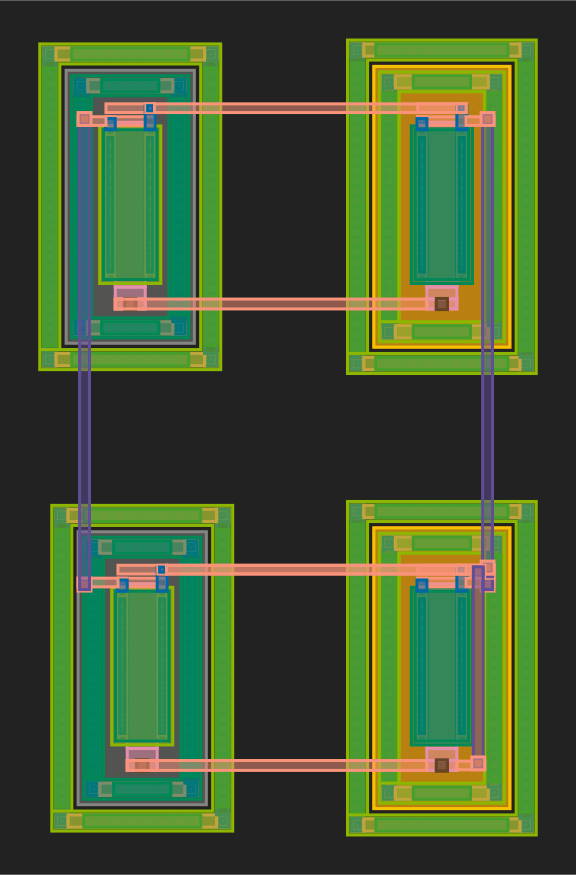

In [9]:
def Buffer(pdk: MappedPDK):
    bufferComp = Component()
    pfet_pmos = pmos(pdk, length=1, width=5, fingers=1, multipliers=1)
    nfet_nmos = nmos(pdk, length=1, width=5, fingers=1, multipliers=1)
    pfet_pmos1 = pmos(pdk, length=1, width=5, fingers=1, multipliers=1)
    nfet_nmos1 = nmos(pdk, length=1, width=5, fingers=1, multipliers=1)
    
    cpmos_pmos = bufferComp << pfet_pmos
    cnmos_nmos = bufferComp << nfet_nmos
    cpmos1_pmos = bufferComp << pfet_pmos1
    cnmos1_nmos = bufferComp << nfet_nmos1
     
    def evaluate_bbox(component):
        return (0,10)
    bbox_value = evaluate_bbox(nfet_nmos)[0]
    cpmos_pmos.movex(bbox_value + pdk.util_max_metal_seperation())
    
    def evaluate_bbox(component):
        return (15,20)
    bbox_value = evaluate_bbox(nfet_nmos1)[0]
    cpmos1_pmos.movey(bbox_value + pdk.util_max_metal_seperation())
    
    def evaluate_bbox(component):
        return (10,20)
    bbox_value = evaluate_bbox(pfet_pmos)[0]
    cnmos_nmos.movex(bbox_value + pdk.util_max_metal_seperation())   
    
    
    def evaluate_bbox(component):
        return (10,15) 
    bbox_value = evaluate_bbox(pfet_pmos1)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cnmos1_nmos.move((x_offset + pdk.util_max_metal_seperation(), y_offset + pdk.util_max_metal_seperation()))
    


    bufferComp << c_route(pdk, cpmos_pmos.ports["multiplier_0_source_W"], cpmos1_pmos.ports["multiplier_0_source_W"]) 
    bufferComp << c_route(pdk, cnmos_nmos.ports["multiplier_0_source_E"], cnmos1_nmos.ports["multiplier_0_source_E"])
    bufferComp << c_route(pdk, cpmos_pmos.ports["multiplier_0_drain_E"], cnmos_nmos.ports["multiplier_0_drain_E"])
    bufferComp << straight_route(pdk, cpmos1_pmos.ports["multiplier_0_drain_E"], cnmos1_nmos.ports["multiplier_0_drain_E"])
    bufferComp << straight_route(pdk, cpmos_pmos.ports["multiplier_0_gate_W"], cnmos_nmos.ports["multiplier_0_gate_W"])
    bufferComp << straight_route(pdk, cpmos1_pmos.ports["multiplier_0_gate_W"], cnmos1_nmos.ports["multiplier_0_gate_W"])
    bufferComp << c_route(pdk, cpmos_pmos.ports["multiplier_0_drain_E"], cnmos_nmos.ports["multiplier_0_gate_E"])
    
    
    
    return bufferComp
Buffer (pdk=sky130).write_gds("Buffer_example.gds")
display_gds("Buffer_example.gds")
    
